In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
HMC = pd.read_csv('/Users/yinchiahuang/Library/Mobile Documents/com~apple~CloudDocs/CS677/Assignments/yinchia@bu.edu_hw1/HMC_Honda Motor Co., Ltd.csv')
ABX = pd.read_csv('/Users/yinchiahuang/Library/Mobile Documents/com~apple~CloudDocs/CS677/Assignments/yinchia@bu.edu_hw8/ABX.csv')

#### Take two stocks, take time Dec 2017

In [3]:
HMC_2017 = HMC.copy()
HMC_2017['Date'] = pd.to_datetime(HMC_2017['Date'])
start_date = '12-01-2017'
end_date = '12-31-2017'
mask = (HMC_2017['Date'] > start_date) & (HMC_2017['Date'] <= end_date)
HMC_2017 = HMC_2017.loc[mask]

ABX_2017 = ABX.copy()
ABX_2017['Date'] = pd.to_datetime(ABX_2017['Date'])
mask = (ABX_2017['Date'] > start_date) & (ABX_2017['Date'] <= end_date)
ABX_2017 = ABX_2017.loc[mask]

In [4]:
def get_returns(df,ticker):
    df['Date'] = df['Date'].astype(str)
    #df['Date'] = df['Date'].str.replace('/', '')
    df['Date'] = df['Date'].str.replace('-', '')
    df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")
    df[ticker] = df['Adj Close'].pct_change()
    df = df[['Date', ticker]]
    df.fillna(0, inplace = True)
    return df

In [5]:
ABX_2017return = get_returns(ABX_2017, 'ABX')
HMC_2017return = get_returns(HMC_2017, 'HMC')

/Users/yinchiahuang/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [6]:
df_2017return = pd.merge(ABX_2017return, HMC_2017return, on='Date', how = 'inner')
df_2017return

,Date,ABX,HMC
0,2017-12-04,0.000000,0.000000
1,2017-12-05,-0.010065,-0.005988
2,2017-12-06,-0.015977,-0.002108
3,2017-12-07,0.008118,0.006640
4,2017-12-08,-0.000732,-0.001799
5,2017-12-11,0.000000,0.001202
6,2017-12-12,-0.000733,0.005700
7,2017-12-13,0.034457,0.006265
8,2017-12-14,0.004252,-0.002075
9,2017-12-15,-0.007763,0.000594


#### Portfolio X1, X2  with a weighted average
- Take 11 different weight combinations: (W1, w2):(1, 0), (0.9, 0.1), (0.8, 0.2) ……., (0.1, 0.9), (0, 1)
- For each combination of weights, compute E(return) and sigma
- Take Y= w1 x X1 + w2 x X2 , E(Y) = w1 x E(X1) + w2 x E(X2)
- Variance(Y) = w1^2 x sigma^2(X1) + 2 x w1 x w2 x sigma(X1) x sigma(X2) + w2^2 x sigma^2(X2)

In [7]:
# calculate expected return
ER_HMC = df_2017return["HMC"].mean()
ER_ABX = df_2017return["ABX"].mean()

# calcuate tandard deviation(sigma)
sd_HMC = df_2017return["HMC"].std()
sd_ABX = df_2017return["ABX"].std()


# weights combination
w1_list = [1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.0]
w2_list = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
ER_portfolio_list = []
variance_list = []
sigma_list = []

for i in range(11):
    w1 = w1_list[i]
    w2 = w2_list[i]
    ER_portfolio = round((w1*ER_HMC + w2*ER_ABX),5)
    variance = round(((w1**2) * (sd_HMC**2) + (w2**2) * (sd_ABX**2) + 2*w1*w2*sd_HMC*sd_ABX),6)
    sigma = round(math.sqrt(variance),5)
    
    ER_portfolio_list.append(ER_portfolio)
    variance_list.append(variance)
    sigma_list.append(sigma)
    
    
df = pd.DataFrame({ 'w1' : w1_list,
                     'w2' : w2_list,
                     'E(return)' : ER_portfolio_list,
                     'Variance' : variance_list,
                     'sigma' : sigma_list})
df

,w1,w2,E(return),Variance,sigma
0,1.0,0.0,0.00143,0.000021,0.00458
1,0.9,0.1,0.00150,0.000028,0.00529
2,0.8,0.2,0.00157,0.000035,0.00592
3,0.7,0.3,0.00164,0.000043,0.00656
4,0.6,0.4,0.00171,0.000052,0.00721
5,0.5,0.5,0.00178,0.000061,0.00781
6,0.4,0.6,0.00185,0.000072,0.00849
7,0.3,0.7,0.00193,0.000083,0.00911
8,0.2,0.8,0.00200,0.000096,0.00980
9,0.1,0.9,0.00207,0.000109,0.01044


#### Plot the graph  (return, volatility)   for each combination of weights

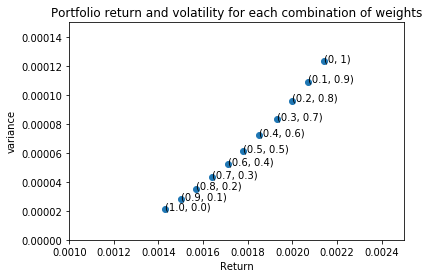

In [8]:
weights = [(1.0,0.0),(0.9,0.1),(0.8,0.2),(0.7,0.3),(0.6,0.4),(0.5,0.5),(0.4,0.6),(0.3,0.7),(0.2,0.8),(0.1,0.9),(0,1)]

fig, ax = plt.subplots()
ax.scatter(ER_portfolio_list, variance_list)

plt.xlabel('Return')
plt.xlim(0.001, 0.0025)
plt.ylabel('variance')
plt.ylim(0, 0.00015)
plt.title('Portfolio return and volatility for each combination of weights')

for i, txt in enumerate(weights):
    ax.annotate(txt, (ER_portfolio_list[i], variance_list[i]))

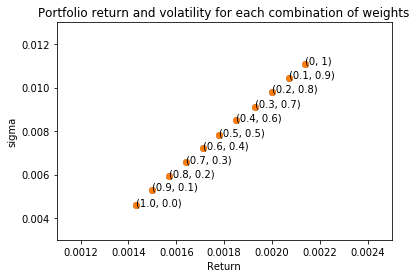

In [16]:
fig, ax = plt.subplots()
ax.scatter(ER_portfolio_list, sigma_list)

plt.scatter(ER_portfolio_list, sigma_list)
plt.xlabel('Return')
plt.xlim(0.0011, 0.0025)
plt.ylabel('sigma')
plt.ylim(0.003, 0.013)

plt.title('Portfolio return and volatility for each combination of weights')

for i, txt in enumerate(weights):
    ax.annotate(txt, (ER_portfolio_list[i], sigma_list[i]))